In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mloey1/ahcd1


Dataset URL: https://www.kaggle.com/datasets/mloey1/ahcd1
License(s): DbCL-1.0
 88% 21.0M/24.0M [00:01<00:00, 30.4MB/s]
100% 24.0M/24.0M [00:01<00:00, 21.8MB/s]


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/ahcd1.zip','r') as zipObj:
  zipObj.extractall('data/all')

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical


In [ ]:
path = '/content/data/all'                                                         # Here we specify the path to our data location on my drive
train_data_x = pd.read_csv(path + '/csvTrainImages 13440x1024.csv', header=None)# Then we load the training images.
train_data_y = pd.read_csv(path + '/csvTrainLabel 13440x1.csv', header=None)    # Training labels.
test_data_x = pd.read_csv(path + '/csvTestImages 3360x1024.csv', header=None)   # Testing images.
test_data_y = pd.read_csv(path + '/csvTestLabel 3360x1.csv', header=None)       # Testing labels.


In [ ]:
print('We have  %d training images each contains %d pixels.' %(train_data_x.shape[0], train_data_x.shape[1]))
print('We have  %d training labels each contains %d classes.' %(train_data_y.shape[0], len(train_data_y.value_counts())))
print('We have  %d testing images each contains %d pixels.' %(test_data_x.shape[0], test_data_x.shape[1]))
print('We have  %d testing labels each contains %d classes.' %(test_data_y.shape[0], len(test_data_y.value_counts())))


We have  13440 training images each contains 1024 pixels.
We have  13440 training labels each contains 28 classes.
We have  3360 testing images each contains 1024 pixels.
We have  3360 testing labels each contains 28 classes.


In [ ]:
train_data_y.value_counts()


1     480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
15    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
28    480
Name: count, dtype: int64

**رسم 20 صوره من بيانات الاخنبار**

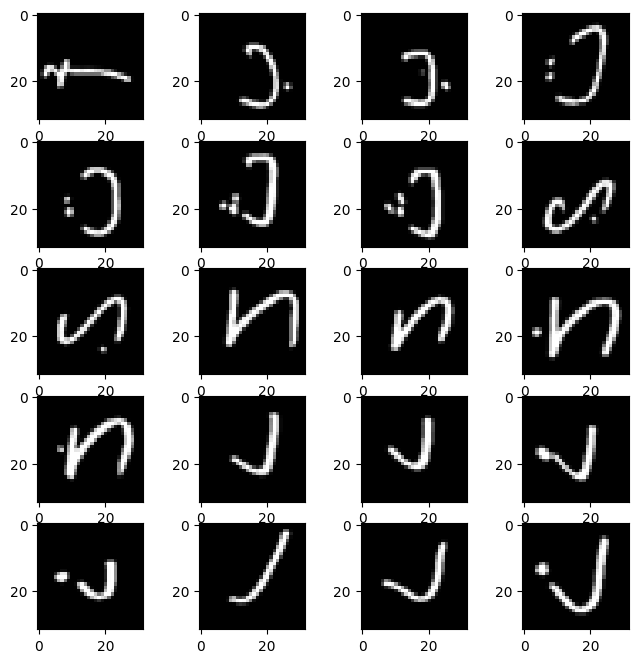

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = test_data_x.iloc[i].to_numpy().reshape((32,32))
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
plt.show()                                                                      # Finally shpwing the whole plot containing all the subplots

**مرحله preprocessing**

In [ ]:
def preprocess_data(train_data_x):
  train_data_x = train_data_x.to_numpy().reshape((train_data_x.shape[0], 32, 32)).astype('uint8')
  for i in range(len(train_data_x)):
    train_data_x[i] = cv2.rotate(train_data_x[i], cv2.ROTATE_90_CLOCKWISE)
    train_data_x[i] = np.flip(train_data_x[i], 1)
  train_data_x = train_data_x.reshape([-1, 32, 32, 1]).astype('uint8')
  train_data_x = train_data_x.astype('float32')/255
  return np.asarray(train_data_x)


In [ ]:
train_x = preprocess_data(train_data_x)                                         # Returns an array of dimensions (13440,32,32,1).()
test_x = preprocess_data(test_data_x)                                           # Returns an array of dimensions (3360,32,32,1).


In [ ]:
train_y = to_categorical(train_data_y.values.astype('int32') - 1
                         , num_classes=28)
test_y = to_categorical(test_data_y.values.astype('int32') - 1                  # Returns an array of dimentions (3360, 28).
                        , num_classes=28)


In [ ]:
%%capture
from sklearn.utils import shuffle                                               # Importing shuffle function from sklearn library.
train_x, train_y = shuffle(train_x, train_y)                                    # Now we shuffle x & y in the training set.
test_x, test_y, shuffle(test_x, test_y)                                         # Then x & y in our testing set.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten

def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):

    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 1), activation= activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(28, activation='softmax'))
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

In [ ]:
model = create_model()                                                          # Now we created an instance of a model with our custom architefture.
model.summary()                                                                 # Then we display our model's summary.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                        

In [ ]:
seed = 7                                                                        # Select a fixed seed
np.random.seed(seed)                                                            # Specifing the seed for our random generator

optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']                             # Available optimizers
kernel_initializer = ['normal', 'uniform']                                      # Available initializing methods
activation = ['relu', 'linear', 'tanh']                                         # Available activation functions

param_grid = dict(optimizer=optimizer,                                          # Creating the grid
                  kernel_initializer=kernel_initializer,
                  activation=activation)

parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x])
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


In [ ]:
epochs = 5                                                                      # Specifing the number of epochs for each combination
batch_size = 64                                                                 # Setting the batch size

# Here we will create our different models and run them for 5 epochs each.
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(optimizer=a, kernel_initializer=b, activation=c)
    curr_model.fit(train_x, train_y,
                    validation_split=0.3,
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")


{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
147/147 [==============================] - 28s 178ms/step - loss: 3.4167 - accuracy: 0.3608 - val_loss: 5.9827 - val_accuracy: 0.0350
Epoch 2/5
147/147 [==============================] - 23s 155ms/step - loss: 1.6571 - accuracy: 0.6999 - val_loss: 6.6816 - val_accuracy: 0.0350
Epoch 3/5
147/147 [==============================] - 25s 169ms/step - loss: 0.9400 - accuracy: 0.8337 - val_loss: 6.1386 - val_accuracy: 0.0350
Epoch 4/5
147/147 [==============================] - 25s 168ms/step - loss: 0.6339 - accuracy: 0.8796 - val_loss: 2.7460 - val_accuracy: 0.1379
Epoch 5/5
147/147 [==============================] - 24s 162ms/step - loss: 0.4848 - accuracy: 0.9118 - val_loss: 0.6472 - val_accuracy: 0.8681
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
147/147 [==============================] - 26s 166ms/step - loss: 2.4224 - accuracy: 0.4562 - val_loss: 4.7651 

**انشاء نموذج للتتدريب**

In [ ]:
model = create_model(optimizer='adam',
                     kernel_initializer='uniform',
                     activation='relu')


**حفظ افضل weight في كل دوره**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint                                     # We will import a call back to save the best epoch's weights

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_x,
                    train_y,
                    validation_split= 0.3,                                      # The model will split the data into 30% of validation.
                    epochs=30,                                                  # We will run the model for 30 epochs
                    batch_size=64,                                              # We will have a batch size of 64
                    callbacks=[checkpointer])                                   # Finally we will use the imported callback


Epoch 1/30
147/147 [==============================] - ETA: 0s - loss: 2.8687 - accuracy: 0.3220
Epoch 1: val_loss improved from inf to 5.68469, saving model to weights.hdf5
147/147 [==============================] - 27s 167ms/step - loss: 2.8687 - accuracy: 0.3220 - val_loss: 5.6847 - val_accuracy: 0.0352
Epoch 2/30
  1/147 [..............................] - ETA: 18s - loss: 2.0669 - accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


147/147 [==============================] - ETA: 0s - loss: 1.5668 - accuracy: 0.6708
Epoch 2: val_loss improved from 5.68469 to 5.63650, saving model to weights.hdf5
147/147 [==============================] - 25s 168ms/step - loss: 1.5668 - accuracy: 0.6708 - val_loss: 5.6365 - val_accuracy: 0.0409
Epoch 3/30
147/147 [==============================] - ETA: 0s - loss: 0.9564 - accuracy: 0.8157
Epoch 3: val_loss improved from 5.63650 to 5.50383, saving model to weights.hdf5
147/147 [==============================] - 23s 157ms/step - loss: 0.9564 - accuracy: 0.8157 - val_loss: 5.5038 - val_accuracy: 0.0350
Epoch 4/30
147/147 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.8832
Epoch 4: val_loss improved from 5.50383 to 2.13042, saving model to weights.hdf5
147/147 [==============================] - 24s 163ms/step - loss: 0.6592 - accuracy: 0.8832 - val_loss: 2.1304 - val_accuracy: 0.3986
Epoch 5/30
147/147 [==============================] - ETA: 0s - loss: 0.5093 -

In [ ]:
model.load_weights('weights.hdf5')                                              # تحميل الوزن المحفوظ بواسطة ModelCheckpoint.
model.evaluate(test_x, test_y)                                                  # تقييم النموذج باستخدام بيانات الاختبار  واسترجاع الخسارة والدقة.


105/105 [==============================] - 2s 20ms/step - loss: 0.2618 - accuracy: 0.9568


[0.26184549927711487, 0.956845223903656]

**رسم بياني يوضح التغير في الدقة والخسارة **

Text(0.5, 1.0, 'Training and validation loss')

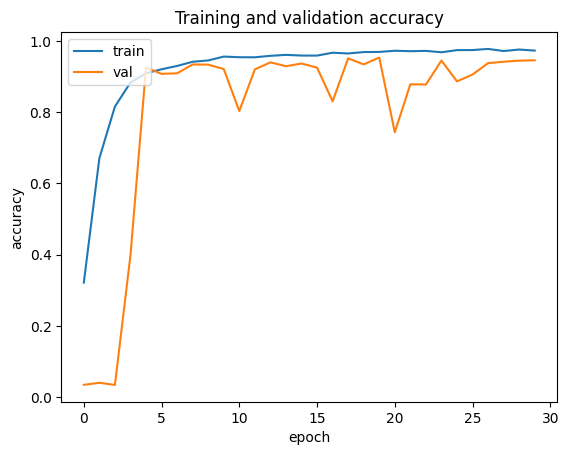

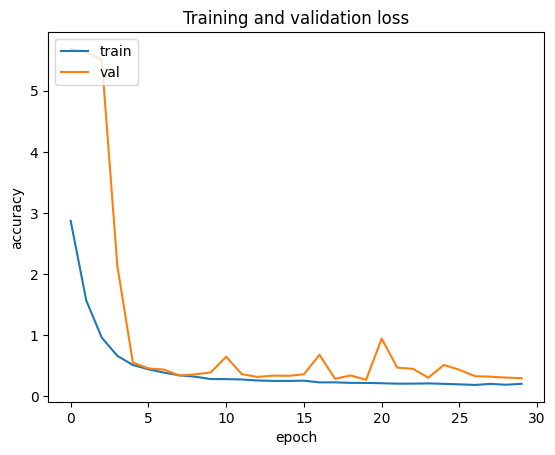

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.title('Training and validation loss')


In [ ]:
model.save('my_model.h5')


In [ ]:
model = tf.keras.models.load_model('my_model.h5')                      # Now we load the model


In [ ]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]


In [ ]:

from tensorflow.keras.models import load_model


model = load_model('my_model.h5')


test_data_x = '/content/data/all/csvTestImages 3360x1024.csv'
test_data_y = '/content/data/all/csvTestLabel 3360x1.csv'

predictions = model.predict(test_x)

for i in range(len(test_x)):
    predicted_label = np.argmax(predictions[i])
    real_label = np.argmax(test_y[i])
    print(f"Sample {i+1}: Predicted: {convert_categorical_label_to_real_label(predicted_label)}, Actual: {convert_categorical_label_to_real_label(real_label)}")


105/105 [==============================] - 3s 23ms/step
Sample 1: Predicted: أ, Actual: أ
Sample 2: Predicted: أ, Actual: أ
Sample 3: Predicted: ب, Actual: ب
Sample 4: Predicted: ب, Actual: ب
Sample 5: Predicted: ت, Actual: ت
Sample 6: Predicted: ت, Actual: ت
Sample 7: Predicted: ث, Actual: ث
Sample 8: Predicted: ث, Actual: ث
Sample 9: Predicted: ج, Actual: ج
Sample 10: Predicted: ج, Actual: ج
Sample 11: Predicted: ح, Actual: ح
Sample 12: Predicted: ح, Actual: ح
Sample 13: Predicted: خ, Actual: خ
Sample 14: Predicted: خ, Actual: خ
Sample 15: Predicted: د, Actual: د
Sample 16: Predicted: د, Actual: د
Sample 17: Predicted: د, Actual: ذ
Sample 18: Predicted: ذ, Actual: ذ
Sample 19: Predicted: ر, Actual: ر
Sample 20: Predicted: ر, Actual: ر
Sample 21: Predicted: ذ, Actual: ز
Sample 22: Predicted: ز, Actual: ز
Sample 23: Predicted: س, Actual: س
Sample 24: Predicted: س, Actual: س
Sample 25: Predicted: ش, Actual: ش
Sample 26: Predicted: ش, Actual: ش
Sample 27: Predicted: ص, Actual: ص
Sample 2

In [ ]:
from sklearn.metrics import accuracy_score

y_true = [convert_categorical_label_to_real_label(np.argmax(label)) for label in test_y]

y_pred = [convert_categorical_label_to_real_label(np.argmax(prediction)) for prediction in predictions]

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9568452380952381
